In [1]:
%matplotlib inline
import numpy as np
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import os
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
list_cHW = []
list_SM = []
for name in os.listdir('500GeV_res/csv/'):
    if name.split('_')[-1] == '0.0.csv' and name.split('_')[1] != '0.0':
        filename = '500GeV_res/csv/' + name
        df = pd.read_csv(filename,delimiter= ' ')
        list_cHW.append(df)
    elif name.split('_')[-1] == '0.0.csv' and name.split('_')[1] == '0.0':
        filename = '500GeV_res/csv/' + name
        df = pd.read_csv(filename,delimiter= ' ')
        list_SM.append(df)

In [3]:
list_cHW[5]['cHW'][0]

0.019999999553000001

In [4]:
cHW_0d03_df = list_cHW[0]
cHW_0d01_df = list_cHW[1]
cHW_m0d01_df = list_cHW[2]
cHW_m0d02_df = list_cHW[3]
cHW_m0d03_df = list_cHW[4]
cHW_0d02_df = list_cHW[5]

In [5]:
#cHW_df = pd.concat(list_cHW,ignore_index=True)
SM_df = pd.concat(list_SM,ignore_index=True)

In [6]:
cHW_0d03_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
cHW_0d01_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
cHW_m0d01_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
cHW_m0d02_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
cHW_m0d03_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)
cHW_0d02_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)

In [7]:
SM_df.drop(['cHW','tcHW','xsec','PT_j1','PT_j2'],axis=1,inplace=True)

In [8]:
y_cHW_0d03 = np.concatenate((np.ones(cHW_0d03_df.shape[0]), np.zeros(SM_df.shape[0])))
y_cHW_0d01 = np.concatenate((np.ones(cHW_0d01_df.shape[0]), np.zeros(SM_df.shape[0])))
y_cHW_m0d01 = np.concatenate((np.ones(cHW_m0d01_df.shape[0]), np.zeros(SM_df.shape[0])))
y_cHW_m0d02 = np.concatenate((np.ones(cHW_m0d02_df.shape[0]), np.zeros(SM_df.shape[0])))
y_cHW_m0d03 = np.concatenate((np.ones(cHW_m0d03_df.shape[0]), np.zeros(SM_df.shape[0])))
y_cHW_0d02 = np.concatenate((np.ones(cHW_0d02_df.shape[0]), np.zeros(SM_df.shape[0])))

In [9]:
X_0d03 = pd.concat([cHW_0d03_df, SM_df], ignore_index=True)
X_0d01 = pd.concat([cHW_0d01_df, SM_df], ignore_index=True)
X_m0d01 = pd.concat([cHW_m0d01_df, SM_df], ignore_index=True)
X_m0d02 = pd.concat([cHW_m0d02_df, SM_df], ignore_index=True)
X_m0d03 = pd.concat([cHW_m0d03_df, SM_df], ignore_index=True)
X_0d02 = pd.concat([cHW_0d02_df, SM_df], ignore_index=True)

In [10]:
from sklearn import preprocessing
scale = StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [11]:
for i in [X_0d01, X_0d02, X_0d03, 
         X_m0d01, X_m0d02, X_m0d03]:
    i = scaleColumns(i,['Eta_H', 'M_H', 'PT_ZH',
                    'PT_b1', 'PT_b2', 'Cos_Hb1', 
                    'PT_l2', 'PT_l1', 'M_Z', 
                    'Cos_lZ', 'PT_H', 'PT_ll', 
                    'DPHI_ll', 'phi_H','M_ZH'])

In [12]:
X_0d01.head()

,Eta_H,M_H,PT_ZH,PT_b1,PT_b2,Cos_Hb1,PT_l2,PT_l1,M_Z,Cos_lZ,PT_H,PT_ll,DPHI_ll,phi_H,M_ZH
0,0.541608,0.739535,0.033843,0.640307,0.614767,0.591662,0.002403,0.976558,0.123492,0.990333,0.934372,0.968789,0.440912,0.756256,0.947607
1,0.697995,0.760311,0.042827,0.551565,0.392266,0.717753,0.430893,0.526605,0.122523,0.602299,0.746313,0.765345,0.155383,0.968091,0.960441
2,0.707384,0.539840,0.182170,0.431236,0.327086,0.728348,0.156545,0.653383,0.122756,0.769497,0.606119,0.738814,0.160950,0.488247,0.863189
3,0.643632,0.260025,0.291215,0.340092,0.657577,0.370704,0.681318,0.516844,0.126711,0.441507,0.709168,0.907625,0.132159,0.916159,0.823341
4,0.709504,0.612776,0.089288,0.313512,0.662052,0.347212,0.542367,0.415616,0.119332,0.541452,0.656737,0.741428,0.017468,0.981449,0.913446


In [13]:
X_train_cHW_0d03, X_test_cHW_0d03, y_train_cHW_0d03, y_test_cHW_0d03 = train_test_split(X_0d03, y_cHW_0d03, train_size=0.8, test_size=0.2)
X_train_cHW_0d02, X_test_cHW_0d02, y_train_cHW_0d02, y_test_cHW_0d02 = train_test_split(X_0d02, y_cHW_0d02, train_size=0.8, test_size=0.2)
X_train_cHW_0d01, X_test_cHW_0d01, y_train_cHW_0d01, y_test_cHW_0d01 = train_test_split(X_0d01, y_cHW_0d01, train_size=0.8, test_size=0.2)
X_train_cHW_m0d01, X_test_cHW_m0d01, y_train_cHW_m0d01, y_test_cHW_m0d01 = train_test_split(X_m0d01, y_cHW_m0d01, train_size=0.8, test_size=0.2)
X_train_cHW_m0d02, X_test_cHW_m0d02, y_train_cHW_m0d02, y_test_cHW_m0d02 = train_test_split(X_m0d02, y_cHW_m0d02, train_size=0.8, test_size=0.2)
X_train_cHW_m0d03, X_test_cHW_m0d03, y_train_cHW_m0d03, y_test_cHW_m0d03 = train_test_split(X_m0d03, y_cHW_m0d03, train_size=0.8, test_size=0.2)

In [14]:
from sklearn.utils import class_weight
weights_train_cHW_0d03 = class_weight.compute_class_weight('balanced', np.unique(y_train_cHW_0d03),y_train_cHW_0d03)
weights_train_cHW_0d02 = class_weight.compute_class_weight('balanced', np.unique(y_train_cHW_0d02),y_train_cHW_0d02)
weights_train_cHW_0d01 = class_weight.compute_class_weight('balanced', np.unique(y_train_cHW_0d01),y_train_cHW_0d01)
weights_train_cHW_m0d01 = class_weight.compute_class_weight('balanced', np.unique(y_train_cHW_m0d01),y_train_cHW_m0d01)
weights_train_cHW_m0d02 = class_weight.compute_class_weight('balanced', np.unique(y_train_cHW_m0d02),y_train_cHW_m0d02)
weights_train_cHW_m0d03 = class_weight.compute_class_weight('balanced', np.unique(y_train_cHW_m0d03),y_train_cHW_m0d03)

In [15]:
print(weights_train_cHW_0d03)
print(weights_train_cHW_0d02)
print(weights_train_cHW_0d01)
print(weights_train_cHW_m0d01)
print(weights_train_cHW_m0d02)
print(weights_train_cHW_m0d03)

[ 1.00657562  0.99350974]
[ 0.99788669  1.00212228]
[ 1.00055432  0.99944629]
[ 0.99848592  1.00151868]
[ 0.98970321  1.0105133 ]
[ 0.99459378  1.00546532]


In [16]:
class_weights_dic_cHW_0d03 = dict()
class_weights_dic_cHW_0d02 = dict()
class_weights_dic_cHW_0d01 = dict()
class_weights_dic_cHW_m0d01 = dict()
class_weights_dic_cHW_m0d02 = dict()
class_weights_dic_cHW_m0d03 = dict()

for i in range(len(weights_train_cHW_0d03)):
    class_weights_dic_cHW_0d03[i] = weights_train_cHW_0d03[i]
    
for i in range(len(weights_train_cHW_0d02)):
    class_weights_dic_cHW_0d02[i] = weights_train_cHW_0d02[i]    
    
for i in range(len(weights_train_cHW_0d01)):
    class_weights_dic_cHW_0d01[i] = weights_train_cHW_0d01[i]    

for i in range(len(weights_train_cHW_m0d01)):
    class_weights_dic_cHW_m0d01[i] = weights_train_cHW_m0d01[i]
    
for i in range(len(weights_train_cHW_m0d02)):
    class_weights_dic_cHW_m0d02[i] = weights_train_cHW_m0d02[i]    
    
for i in range(len(weights_train_cHW_m0d03)):
    class_weights_dic_cHW_m0d03[i] = weights_train_cHW_m0d03[i]    

In [17]:
class_weights_dic_cHW_m0d03

{0: 0.9945937752627324, 1: 1.0054653182143223}

In [18]:
param_grid = {
    'loss': ['log'],
    'penalty':['l2', 'l1'],
    'learning_rate':['optimal'],
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}

In [19]:
clf_cHW_0d03 = SGDClassifier(random_state=42, class_weight=class_weights_dic_cHW_0d03,
                    tol=1e-3,verbose=0)

clf_cHW_0d02 = SGDClassifier(random_state=42, class_weight=class_weights_dic_cHW_0d02,
                    tol=1e-3,verbose=0)

clf_cHW_0d01 = SGDClassifier(random_state=42, class_weight=class_weights_dic_cHW_0d01,
                    tol=1e-3,verbose=0)

clf_cHW_m0d01 = SGDClassifier(random_state=42, class_weight=class_weights_dic_cHW_m0d01,
                    tol=1e-3,verbose=0)

clf_cHW_m0d02 = SGDClassifier(random_state=42, class_weight=class_weights_dic_cHW_m0d02,
                    tol=1e-3,verbose=0)

clf_cHW_m0d03 = SGDClassifier(random_state=42, class_weight=class_weights_dic_cHW_m0d03,
                    tol=1e-3,verbose=0)

In [20]:
clf_grid_cHW_0d03 = GridSearchCV(estimator=clf_cHW_0d03, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_cHW_0d03.fit(X=X_train_cHW_0d03,y=y_train_cHW_0d03)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0065756196256954, 1: 0.99350973539690468},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [21]:
clf_best_cHW_0d03 = clf_grid_cHW_0d03.best_estimator_

In [22]:
from sklearn.metrics import roc_curve, auc

def compare_train_test(clf, X_train, y_train, X_test, y_test, cHW_value, bins=30):
    decisions = []
    for X,y in ((X_train, y_train), (X_test, y_test)):
        d1 = clf.decision_function(X[y>0.5]).ravel()
        d2 = clf.decision_function(X[y<0.5]).ravel()
        decisions += [d1, d2]
        
    low = min(np.min(d) for d in decisions)
    high = max(np.max(d) for d in decisions)
    low_high = (low,high)

    fig, ax = plt.subplots(1,2,figsize=(12,6))
    
    ax[0].hist(decisions[0],
             color='r', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='$c_{HW} =$ %s (train)' %cHW_value)
    ax[0].hist(decisions[1],
             color='b', alpha=0.5, range=low_high, bins=bins,
             histtype='stepfilled', normed=True,
             label='$c_{HW} = 0$ (train)')
    hist, bins = np.histogram(decisions[2],
                              bins=bins, range=low_high, normed=True)
    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax[0].errorbar(center, hist, yerr=err, fmt='o', c='r', label='$c_{HW} =$ %s (test)' %cHW_value)

    hist, bins = np.histogram(decisions[3],
                              bins=bins, range=low_high, normed=True)

    scale = len(decisions[2]) / sum(hist)
    err = np.sqrt(hist * scale) / scale

    ax[0].errorbar(center, hist, yerr=err, fmt='o', c='b', label='$c_{HW} = 0$ (test)')

    ax[0].set_xlabel("SGD output")
    ax[0].set_ylabel("Arbitrary units")
    ax[0].legend(loc='best')
    
    ######ROC
    probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, lw=2.2, alpha=0.7, c='r',
             label='ROC (AUC = %0.2f)' % (roc_auc))
    ax[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='k',
         label='Chance', alpha=.8)
    ax[1].set_xlim([-0.05, 1.05])
    ax[1].set_ylim([-0.05, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver operating characteristic')
    plt.legend(loc="lower right")


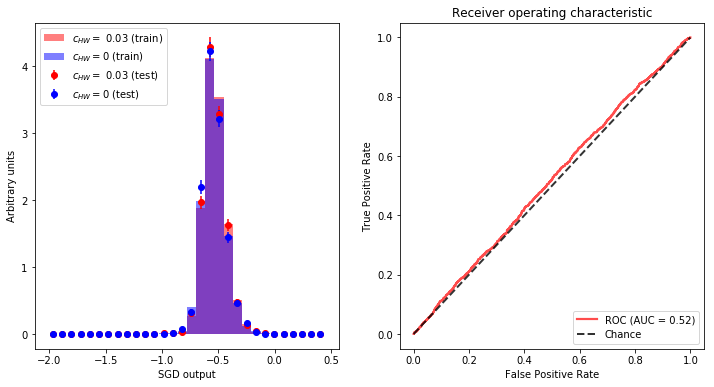

In [23]:
compare_train_test(clf_best_cHW_0d03, X_train_cHW_0d03, y_train_cHW_0d03, 
                   X_test_cHW_0d03, y_test_cHW_0d03, 0.03)

In [24]:
clf_grid_cHW_0d02 = GridSearchCV(estimator=clf_cHW_0d02, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_cHW_0d02.fit(X=X_train_cHW_0d02,y=y_train_cHW_0d02)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 0.99788668612257225, 1: 1.0021222839818089},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [25]:
clf_best_cHW_0d02 = clf_grid_cHW_0d02.best_estimator_

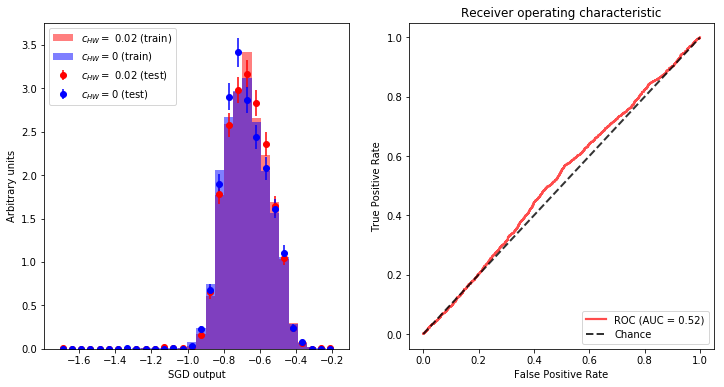

In [26]:
compare_train_test(clf_best_cHW_0d02, X_train_cHW_0d02, y_train_cHW_0d02, 
                   X_test_cHW_0d02, y_test_cHW_0d02, 0.02)

In [27]:
clf_grid_cHW_0d01 = GridSearchCV(estimator=clf_cHW_0d01, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_cHW_0d01.fit(X=X_train_cHW_0d01,y=y_train_cHW_0d01)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 1.0005543237250554, 1: 0.99944629014396458},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [28]:
clf_best_cHW_0d01 = clf_grid_cHW_0d01.best_estimator_

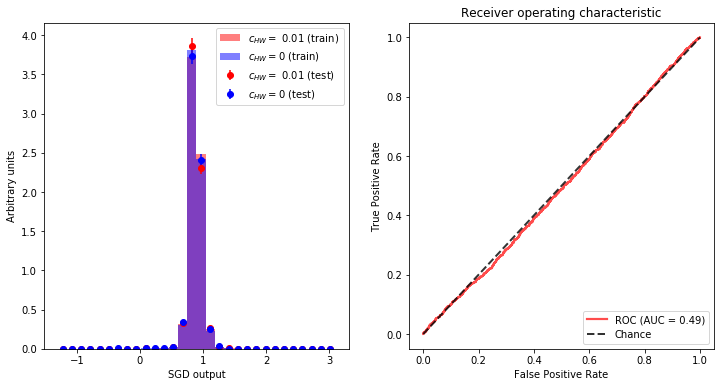

In [29]:
compare_train_test(clf_best_cHW_0d01, X_train_cHW_0d01, y_train_cHW_0d01, 
                   X_test_cHW_0d01, y_test_cHW_0d01, 0.01)

In [30]:
clf_grid_cHW_m0d01 = GridSearchCV(estimator=clf_cHW_m0d01, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_cHW_m0d01.fit(X=X_train_cHW_m0d01,y=y_train_cHW_m0d01)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 0.99848591904713835, 1: 1.0015186797610611},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [31]:
clf_best_cHW_m0d01 = clf_grid_cHW_m0d01.best_estimator_

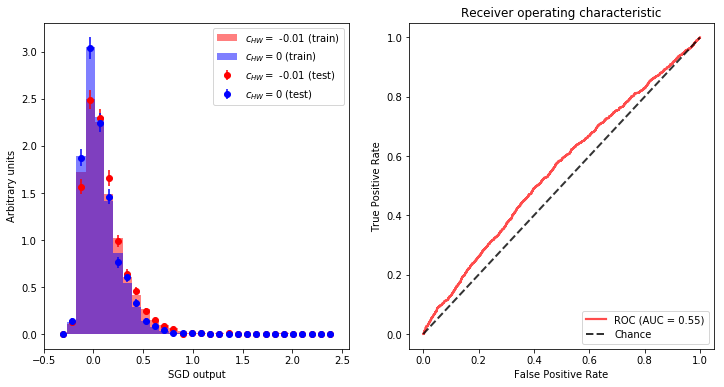

In [32]:
compare_train_test(clf_best_cHW_m0d01, X_train_cHW_m0d01, y_train_cHW_m0d01, 
                   X_test_cHW_m0d01, y_test_cHW_m0d01, -0.01)

In [33]:
clf_grid_cHW_m0d02 = GridSearchCV(estimator=clf_cHW_m0d02, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_cHW_m0d02.fit(X=X_train_cHW_m0d02,y=y_train_cHW_m0d02)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 0.9897032101756511, 1: 1.010513296227582},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [34]:
clf_best_cHW_m0d02 = clf_grid_cHW_m0d02.best_estimator_

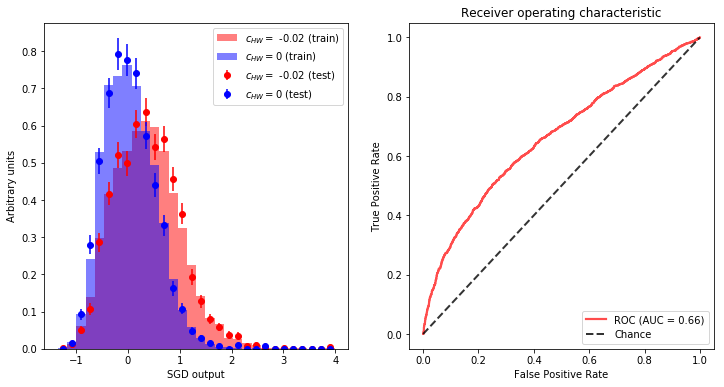

In [35]:
compare_train_test(clf_best_cHW_m0d02, X_train_cHW_m0d02, y_train_cHW_m0d02, 
                   X_test_cHW_m0d02, y_test_cHW_m0d02, -0.02)

In [36]:
clf_grid_cHW_m0d03 = GridSearchCV(estimator=clf_cHW_m0d03, param_grid=param_grid,
                                    n_jobs=2, scoring='roc_auc')

clf_grid_cHW_m0d03.fit(X=X_train_cHW_m0d03,y=y_train_cHW_m0d03)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 0.9945937752627324, 1: 1.0054653182143223},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l2', 'l1'], 'loss': ['log'], 'learning_rate': ['optimal'], 'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1], 'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [37]:
clf_best_cHW_m0d03 = clf_grid_cHW_m0d03.best_estimator_

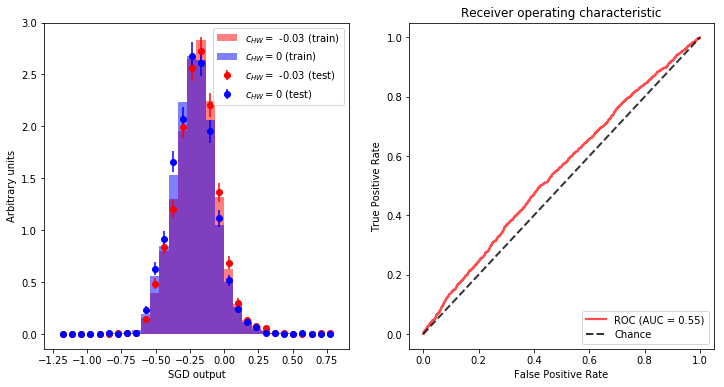

In [38]:
compare_train_test(clf_best_cHW_m0d03, X_train_cHW_m0d03, y_train_cHW_m0d03, 
                   X_test_cHW_m0d03, y_test_cHW_m0d03, -0.03)